# Máster en Data Science - Machine Learning

# Exploratory Data Analysis
Autor: Ramón Morillo Barrera

## Dataset: Application data

### Sobre el dataset:
Se trata de una base de datos de registros de préstamos. Cada registro representa a un cliente al que se le ha concedido un préstamo, en los diferentes registros se enumeran las diferentes características de los clientes, las cuales vamos a analizar posteriormente.

### Objetivos de la práctica
Esta práctica tiene como objetivo aplicar técnicas de Análisis Exploratorio de Datos (EDA) para comprender y analizar los patrones presentes en un conjunto de datos relacionado con solicitudes de préstamos. Supongamos que trabajamos para un banco que se especializa en otorgar varios tipos de préstamos a clientes. Tendremos que usar EDA para analizar los patrones presentes en los datos, asegurando que los solicitantes capaces de pagar el préstamo no sean rechazados. Se identificarán patrones que indiquen si un cliente puede tener dificultades para devolver el préstamo, lo que puede ser utilizado para tomar acciones.

#### Pasos a seguir

1. Análisis inicial de los datos y preprocesamiento inicial:
   - Iniciaremos explorando el conjunto de datos con el que trabajaremos, realizando un análisis descriptivo de las variables y las instancias que lo componen. Este análisis incluye examinar la distribución de los datos y observar relaciones entre las distintas variables, prestando especial atención a la variable objetivo (Target). A partir de este estudio, podremos extraer conclusiones sobre la estructura del conjunto de datos y los principales patrones que surgen en un análisis exploratorio inicial.

2. Correlaciones, tratamiento de missing y outliers:
   - En este paso, investigamos las correlaciones entre las variables, identificando relaciones significativas que podrían influir en el modelo. También se abordará el tratamiento de valores faltantes y de los outliers. Determinaremos cómo estos pueden afectar el análisis y definiremos estrategias para su tratamiento o eliminación en caso necesario.

3. Tratamiento de variables categóricas: encoding:
   - Las variables categóricas serán codificadas para que puedan ser utilizadas en el modelo. Implementaremos técnicas de encoding como One-Hot Encoding o Label Encoding, dependiendo de la naturaleza de cada variable, de manera que se optimice la compatibilidad de los datos con los algoritmos que se emplearán.

4. Aplicación de algoritmos:
   - Una vez preprocesados los datos, aplicaremos diferentes algoritmos predictivos. Esto implica realizar todos los procedimientos necesarios de selección de variables y preprocesamiento para asegurar que los datos sean compatibles con los modelos elegidos. Evaluaremos y compararemos el rendimiento de cada algoritmo, observando cuál se ajusta mejor a nuestros datos y comprendiendo las razones detrás de su desempeño. También abordaremos técnicas para tratar datos desbalanceados y verificaremos la efectividad de su aplicación en este contexto. Además, se implementarán técnicas de mejora de modelos, como la validación cruzada (Cross Validation) y la optimización de hiperparámetros (Hyperparameters Tuning).

5. Evaluación con la muestra de test:
   - La evaluación final se realizará con el conjunto de datos de prueba, aplicando el/los modelos seleccionados y midiendo su rendimiento en términos de las métricas elegidas. Esta evaluación permitirá sacar conclusiones sobre la efectividad del modelo en datos nuevos, asegurando que el modelo es robusto y confiable en su predicción.

6. Explicabilidad:
   - Finalmente, añadiremos una capa de interpretabilidad mediante el análisis del funcionamiento interno del modelo. Usaremos métodos específicos de explicabilidad para identificar las variables más y menos importantes y comprender cómo influye cada variable en las decisiones del modelo. Este análisis nos ayudará a entender de forma más clara y transparente el proceso de decisión del modelo y los factores clave que impactan en sus predicciones.

### Caso de negocio:

En la aplicación de un modelo para predecir si los clientes devolverán un préstamo bancario, es crucial considerar el desbalance de datos, los objetivos específicos de negocio y la capacidad de la institución para gestionar el riesgo de impagos. Estos factores son determinantes tanto en la fase de análisis como en el modelado y evaluación del modelo.

El objetivo es mejorar un modelo inicial basado en reglas simples con un modelo de machine learning capaz de detectar patrones complejos en los datos que indiquen la probabilidad de impago, algo que un sistema de reglas difícilmente podría captar. Esto permitirá al banco no solo identificar clientes en riesgo, sino también anticiparse a patrones de incumplimiento menos evidentes.

Como no tenemos conocimiento del momento en el que se va a ejecutar el modelo cuando el cliente va a solicitar el préstamo, voy a suponer que el modelo se ejecutará en el momento en el que el cliente va a solicitar un préstamo, por tanto, observando las variables que se van a analizar no se encuentra ninguna variable a futuro. Trabajaremos con todas las variables que nos proporcionen información hasta el feature processing.

Para evaluar el rendimiento del modelo, se priorizarán métricas como el F1 y F2 Score, con un enfoque particular en la sensibilidad (recall) para identificar la mayor cantidad posible de clientes en riesgo de incumplir el pago. Aunque este enfoque puede aumentar los falsos positivos (casos en los que se prevé riesgo pero el cliente paga puntualmente), asumimos que la institución tiene recursos para gestionar estos casos y que el beneficio de una detección temprana justifica este enfoque. Si se dispusiera de información de costes específicos, una matriz de coste permitiría ajustar mejor el balance entre sensibilidad y precisión.

Este tipo de modelos suele enfrentarse a un desbalance de clases, con menos casos de incumplimiento que de cumplimiento, lo cual requiere técnicas específicas para optimizar tanto el análisis como el rendimiento del modelo. Además, en el sector financiero es clave garantizar la explicabilidad del modelo. Se dedicará un análisis especial para comprender la influencia de cada variable y explicar las decisiones del modelo, facilitando el cumplimiento con las normativas de transparencia y ayudando a comprender mejor los factores que impulsan el riesgo de impago.

Este enfoque integral permitirá no solo prever posibles impagos con anticipación, sino también comprender las razones subyacentes, alineándose con los objetivos y desafíos de negocio en cada etapa del proyecto.


## Diccionario de datos:

In [1]:
import pandas as pd

ruta_dict = '../../data_loan_status/data_dictionary/columns_description.xlsx'
df_dictionary = pd.read_excel(ruta_dict)
df_dictionary

,Unnamed: 0,Table,Row,Description,Special
0,12,application_data,AMT_ANNUITY,Loan annuity,NaN
1,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
2,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
3,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
4,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
...,...,...,...,...,...
155,77,application_data,YEARS_BEGINEXPLUATATION_MEDI,Normalized information about building where th...,normalized
156,63,application_data,YEARS_BEGINEXPLUATATION_MODE,Normalized information about building where th...,normalized
157,50,application_data,YEARS_BUILD_AVG,Normalized information about building where th...,normalized
158,78,application_data,YEARS_BUILD_MEDI,Normalized information about building where th...,normalized


## Exploración Inicial

#### Importo librerías

In [2]:
# import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import sys

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Importo funciones

He de comentar que en el archivo .py importado se encuentran tanto funciones vistas en el máster como funciones propias que me he programado para este proyecto, pues algunas son modificaciones o ajustes de las proporcionadas y otras son funciones distintas a las vistas que me ayudarán a realizar el EDA o visualizar variables de una manera más intuitiva proporcionando una mayor interpretabilidad.

In [3]:
sys.path.append('../src')
import funciones_auxiliares as f_aux
sys.path.remove('../src')

# Constante
seed = 12354

#### Importar Dataset

In [4]:
ruta_output = '../../data_loan_status/raw/application_data.csv'
df_prestamos = pd.read_csv(ruta_output).set_index('SK_ID_CURR')
df_prestamos.head(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

#### Análisis general del Dataset

Vamos a observar las dimensiones del dataset, además de sus tipos de variables y cantidad de valores nulos.

Dimensión

In [6]:
print(df_prestamos.shape, df_prestamos.drop_duplicates().shape)

(307511, 121) (307511, 121)


In [7]:
df_prestamos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


Observamos que este dataframe tiene 121 columnas y 307511 registros, ningún registro está completamente duplicado.

Tipos de datos

In [8]:
df_prestamos.dtypes.to_dict()

{'TARGET': dtype('int64'),
 'NAME_CONTRACT_TYPE': dtype('O'),
 'CODE_GENDER': dtype('O'),
 'FLAG_OWN_CAR': dtype('O'),
 'FLAG_OWN_REALTY': dtype('O'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('O'),
 'NAME_INCOME_TYPE': dtype('O'),
 'NAME_EDUCATION_TYPE': dtype('O'),
 'NAME_FAMILY_STATUS': dtype('O'),
 'NAME_HOUSING_TYPE': dtype('O'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE': dtype('O'),
 'CNT_FAM_MEMBERS': dtype('float64'),
 'REGIO

A priori, se observan variables object y numéricas (enteros y decimales).

In [9]:
df_prestamos.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.14921

En un primer vistazo se observan muchos valores booleanos (min = 0 y max = 1)

In [10]:
df_prestamos.isna().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

Observamos la presencia de valores nulos entre los las columnas, posteriormente tendremos que tratarlos

In [11]:
f_aux.duplicate_columns(df_prestamos)

[]

No hay presencia de columnas duplicadas

#### Exploración de la variable objetivo y tratamiento

In [12]:
df_plot_loan_status = df_prestamos['TARGET']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

df_plot_loan_status_conteo = df_prestamos['TARGET'].value_counts(normalize=True).reset_index()
df_plot_loan_status_conteo

,TARGET,proportion
0,0,0.919271
1,1,0.080729


In [13]:
df_prestamos['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

La variable 'TARGET' es la que nos indica si se produjo retraso en el pago del préstamo.

Como se puede observar, la variable esta **desbalanceada**, hay solo un 8.07% de retrasos en pagos del préstamo

Observamos como el 8.07%  (24,825) de los clientes se retrasaron en el pago del préstamo al menos un día en una cuota del mismo, mientras que el 91.93% (282,686) de los clientes no se retrasaron en el pago del préstamo ningún día en ninguna de las cuotas a pagar.

In [14]:
# Convertir `TARGET` a variable categórica
df_plot_loan_status_conteo['TARGET_LABEL'] = df_plot_loan_status_conteo['TARGET'].replace({0: 'No Retrasado', 1: 'Retrasado'})

# Crear el gráfico de barras
fig = px.bar(
    df_plot_loan_status_conteo, 
    x="TARGET_LABEL", 
    y="proportion", 
    color="TARGET_LABEL", 
    title="Proporción de TARGET",
    labels={"TARGET_LABEL": "Estatus de Pago", "proportion": "Proporción"}
)

# Mostrar el gráfico
fig.show()


Observamos aquí la proporcion de retraso en pago/s de cuota/s préstamo/s de manera visual. El gráfico representa los porcentajes de manera normalizada, en un intervalo [0, 1].

In [15]:
target_count = df_prestamos.groupby('TARGET').agg({'TARGET':'count'}).reset_index(drop=True)
target_count['value'] = list(target_count.index)
target_count

,TARGET,value
0,282686,0
1,24825,1


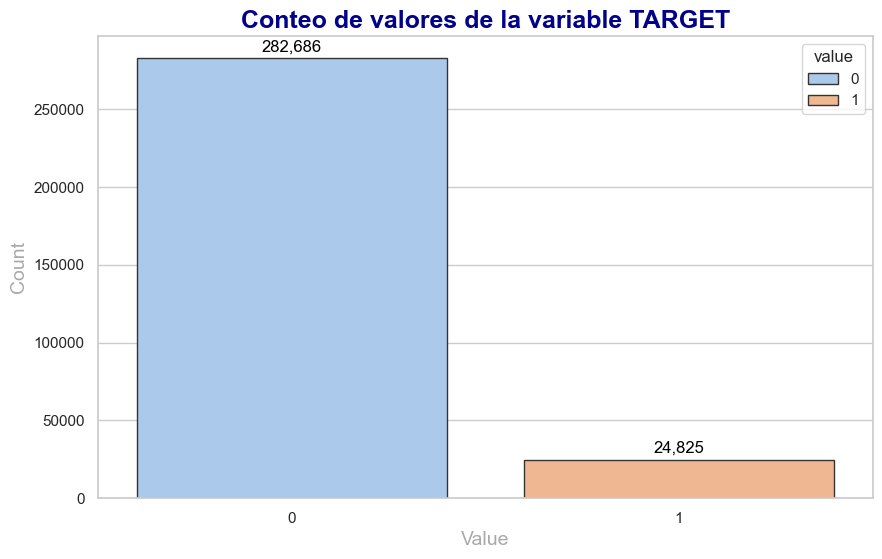

In [16]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño de la gráfica

# Grafico de barras
sns.barplot(
    data=target_count, 
    x='value', 
    y='TARGET', 
    ax=ax, 
    hue='value', 
    dodge=False,  # Evita separación entre barras
    palette="pastel",  
    edgecolor="0.2"    # Añade bordes a las barras
)

# Título y etiquetas de ejes 
ax.set_title('Conteo de valores de la variable TARGET', fontsize=18, fontweight='bold', color='darkblue')
ax.set_ylabel('Count', fontsize=14, color='darkgrey')
ax.set_xlabel('Value', fontsize=14, color='darkgrey')

# Añade las etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type="edge", padding=3, fontsize=12, color="black")

#### Selección de threshold por filas y columnas para eliminar valores missing

Vamos a ver que cantidad y proporción de valores nulos se presentan en cada columna y cada fila del DataFrame

In [5]:
pd_series_null_columns = df_prestamos.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = df_prestamos.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = df_prestamos['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df_prestamos.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df_prestamos.shape[1]

(121,) (307511,)


In [18]:
pd.options.display.max_rows = None

pd_null_columnas

,nulos_columnas,porcentaje_columnas
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_MODE,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550


In [19]:
# Contar columnas con valores nulos
num_columnas_con_nulos = df_prestamos.isnull().any().sum()
print("Número de columnas con valores nulos:", num_columnas_con_nulos)

Número de columnas con valores nulos: 67


In [7]:
threshold=0.8
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
pd_loan_filter_null = df_prestamos.loc[:, list_vars_not_null]
pd_loan_filter_null.shape

(307511, 121)

Establezco el umbral para eliminar columnas con valores nulos en un 0.8 equivalente al 80% de los valores totales de la columna. Ya que a partir del 80% de valores nulos lo he considerado un umbral alto.

Umbral alto (80-90%):

- Si una columna tiene más del 80-90% de valores nulos, es ser recomendable eliminarla, ya que la información de la columna es baja y, generalmente, es difícil tranformar un porcentaje tan alto de datos faltantes sin introducir sesgo o errores significativos.

Umbral moderado (50-80%):

- Para columnas con un 50-80% de valores nulos, la decisión depende de la importancia de la variable alojada en la columna. Si la columna es relevante para el análisis o modelo, se podrían considerar estrategias de transformación o relleno de valores nulos en lugar de eliminarla. Si no es relevante o es difícil de transformar, es posible eliminarla también.

Como nuestra columna con mayor porcentaje de valores nulos presenta un 69.87% de valores faltantes, ninguna columna será eliminada con el umbral establecido al 80%.

Posteriormente estudiaremos y seleccionaremos las variables más importantes para construir el modelo predictivo y realizaremos las transformaciones pertinentes para tratar los valores nulos.

In [21]:
pd_null_filas.shape

(307511, 3)

In [22]:
pd_null_filas.head(20)

,nulos_filas,target,porcentaje_filas
SK_ID_CURR,,,
383369,61,0,0.504132
255145,61,0,0.504132
235599,61,0,0.504132
412312,61,0,0.504132
329262,61,0,0.504132
315294,61,0,0.504132
412671,61,0,0.504132
274127,61,0,0.504132
180861,61,0,0.504132


Observamos como la fila con mayor porcentaje de valores faltantes presenta un 50.41% de valores nulos, de manera que a posteriori cuando seleccionemos variables trataremos estos valores nulos.

## Tipos: Variables categoricas y numericas
En este paso del análisis exploratorio estudiaremos el tipo de cada variable, como vimos anteriormente en el describe del dataset, hay mucha presencia de valores booleanos, por lo que veremos si esas variables numéricas tienen algún tipo de categorización e intentaremos entenderla.

Utilizaré una función propia para categorizar cada variable.

In [6]:
f_aux.obtener_tipos_valores(df_prestamos)

,Variable,Tipo,Valores
0,TARGET,Booleana,"[1, 0]"
1,NAME_CONTRACT_TYPE,Categorica,"[Cash loans, Revolving loans]"
2,CODE_GENDER,Categorica,"[M, F, XNA]"
3,FLAG_OWN_CAR,Categorica,"[N, Y]"
4,FLAG_OWN_REALTY,Categorica,"[Y, N]"
5,CNT_CHILDREN,Numerica,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
6,AMT_INCOME_TOTAL,Numerica,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
7,AMT_CREDIT,Numerica,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
8,AMT_ANNUITY,Numerica,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2..."
9,AMT_GOODS_PRICE,Numerica,"[351000.0, 1129500.0, 135000.0, 297000.0, 5130..."


Observamos valores normales bien categorizados. 

He de comentar que las variables booleanas, aunque presenten una naturaleza numérica como tal, su significado es categórico ya que sus dos únicos valores 0 y 1 corresponden a una categoría de manera indirecta. Pot tanto, en el análisis exploratorio de los datos las trataré y las analizaré como si fueran variables categóricas.

In [24]:
type_counts = df_prestamos.dtypes.value_counts()
print(type_counts)

float64    65
int64      40
object     16
Name: count, dtype: int64


Observamos 105 variables numéricas y 16 variables categóricas

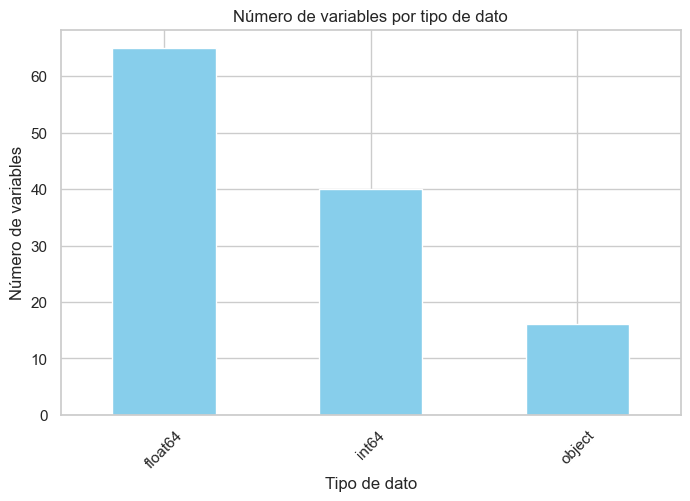

In [25]:
plt.figure(figsize=(8, 5))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Número de variables por tipo de dato')
plt.xlabel('Tipo de dato')
plt.ylabel('Número de variables')
plt.xticks(rotation=45)
plt.show()

#### Estudio de variables categóricas

Vamos a realizar un pequeño estudio de las variables categóricas para observar cuales podemos transformar.

En primer lugar, vamos a transformar todas las variables tipo object a tipo category. Las variables categóricas almacenan los valores como códigos internos en lugar de strings, lo que ocupa menos espacio y permite operaciones más rápidas, además el tipo category facilita técnicas de preprocesamiento como la codificación (label encoding, one-hot encoding) que realizaremos a este tipo de variables más adelante.

In [27]:
sys.path.append('../src')

list_cat_vars, other = f_aux.dame_variables_categoricas(dataset=pd_loan_filter_null)
pd_loan_filter_null[list_cat_vars] = pd_loan_filter_null[list_cat_vars].astype("category")
pd_loan_filter_null[list_cat_vars].head()

,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,CODE_GENDER,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,FLAG_OWN_REALTY,WEEKDAY_APPR_PROCESS_START
SK_ID_CURR,,,,,,,,,,,,,,,,
100002,reg oper account,"Stone, brick",block of flats,No,Laborers,Unaccompanied,Business Entity Type 3,Cash loans,N,M,Working,Single / not married,House / apartment,Secondary / secondary special,Y,WEDNESDAY
100003,reg oper account,Block,block of flats,No,Core staff,Family,School,Cash loans,N,F,State servant,Married,House / apartment,Higher education,N,MONDAY
100004,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,Government,Revolving loans,Y,M,Working,Single / not married,House / apartment,Secondary / secondary special,Y,MONDAY
100006,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,Business Entity Type 3,Cash loans,N,F,Working,Civil marriage,House / apartment,Secondary / secondary special,Y,WEDNESDAY
100007,NaN,NaN,NaN,NaN,Core staff,Unaccompanied,Religion,Cash loans,N,M,Working,Single / not married,House / apartment,Secondary / secondary special,Y,THURSDAY


In [28]:
list_cat_vars

['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START']

Observamos un total de 16 variables categóricas puras, que alojan texto en sus columnas.

In [29]:
pd_loan_filter_null['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [30]:
pd_loan_filter_null['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [31]:
pd_loan_filter_null['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

In [32]:
pd_loan_filter_null[list_cat_vars].dtypes

FONDKAPREMONT_MODE            category
WALLSMATERIAL_MODE            category
HOUSETYPE_MODE                category
EMERGENCYSTATE_MODE           category
OCCUPATION_TYPE               category
NAME_TYPE_SUITE               category
ORGANIZATION_TYPE             category
NAME_CONTRACT_TYPE            category
FLAG_OWN_CAR                  category
CODE_GENDER                   category
NAME_INCOME_TYPE              category
NAME_FAMILY_STATUS            category
NAME_HOUSING_TYPE             category
NAME_EDUCATION_TYPE           category
FLAG_OWN_REALTY               category
WEEKDAY_APPR_PROCESS_START    category
dtype: object

In [33]:
print(pd_loan_filter_null["OCCUPATION_TYPE"].value_counts().count())
pd_loan_filter_null["OCCUPATION_TYPE"]\
    .apply(lambda x: str(x).lower().strip()).value_counts(normalize=True)#.count()

18


OCCUPATION_TYPE
laborers                 0.261396
sales staff              0.152056
core staff               0.130589
managers                 0.101227
drivers                  0.088116
high skill tech staff    0.053903
accountants              0.046481
medicine staff           0.040437
security staff           0.031835
cooking staff            0.028164
cleaning staff           0.022040
private service staff    0.012562
low-skill laborers       0.009914
waiters/barmen staff     0.006385
secretaries              0.006181
realty agents            0.003557
hr staff                 0.002667
it staff                 0.002491
Name: proportion, dtype: float64

Observamos como algunas variables categóricas solo tienen 2 tipos de valores, por lo que podremos transformarlas en variables booleanas con One-Hot encoding más tarde. Las variables con más de 2 tipos de valores o categorias, optaré por aplicarles CatBoost encoding o Target encoding  en la que cada categoría se reemplaza por una estadística (como la media, mediana, etc.) del target o variable objetivo para esa categoría. Con esta técnica conseguimos transformar la columna sin añadir columnas extra. Lo veremos en el siguiente notebook

## Exportación del dataset

In [35]:
pd_loan_filter_null.to_csv("../../data_loan_status/interim/data_preprocessing/pd_data_initial_preprocessing.csv")

He guardado el dataset preprocesado para seguir trabajando con él en siguientes notebooks.

## Conclusiones del EDA parte 1:

- La variable TARGET es una variable booleana, que toma valores de 0 o 1. Siendo 0 el no retraso del pago en al menos una de las cuotas del préstamo y siendo 1 el si retraso del pago en al menos una de las cuotas del préstamo.

- La variable TARGET esta claramente desbalanceada, pues únicamente el 8.07% de clientes se retrasaron en el pago del préstamo. Esto supone que al realizar la separacón de los datos en train y test tendremos que realizarlo de manera estratificada (muy importante), así garantizaremos que la proporción de clases se mantenga igual en ambos conjuntos.

- Nuestro DataFrame cuenta con 105 variables numéricas y 16 categóricas. 

- Tenemos 67 columnas con presencia de valores nulos, que trataremos más adelante.